In [ ]:
!pip install mlxtend


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Online retail.xlsx to Online retail (1).xlsx


In [ ]:
df = pd.read_excel(list(uploaded.keys())[0], header=None)  # Adjust header if needed
print("Sample Data:")
df.head()


Sample Data:


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [ ]:
transactions = df[0].apply(lambda x: x.split(','))  # Convert strings to list of items
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
frequent_itemsets_1 = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets_1.head()


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


In [ ]:
rules_1 = association_rules(frequent_itemsets_1, metric="confidence", min_threshold=0.5)
rules_1[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
0,"(ground beef, eggs)",(mineral water),0.010132,0.506667,2.125563
1,"(milk, ground beef)",(mineral water),0.011065,0.503030,2.110308


In [ ]:
frequent_itemsets_2 = apriori(df_encoded, min_support=0.03, use_colnames=True)
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.6)
rules_2[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift


In [ ]:
frequent_itemsets_3 = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules_3 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=0.7)
rules_3[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift


In [ ]:
print("Rule Count for Support=0.01, Confidence=0.5:", len(rules_1))
print("Rule Count for Support=0.03, Confidence=0.6:", len(rules_2))
print("Rule Count for Support=0.05, Confidence=0.7:", len(rules_3))


Rule Count for Support=0.01, Confidence=0.5: 2
Rule Count for Support=0.03, Confidence=0.6: 0
Rule Count for Support=0.05, Confidence=0.7: 0


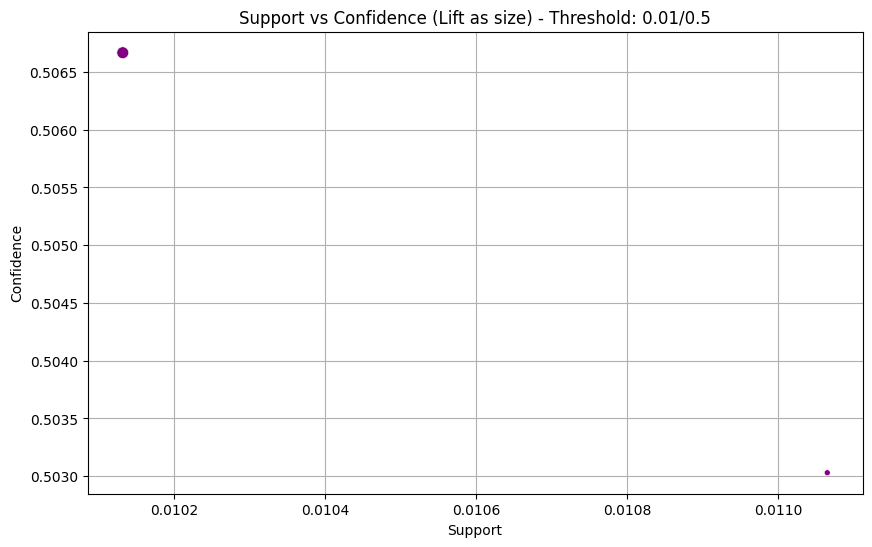

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules_1, legend=False, color='purple')
plt.title("Support vs Confidence (Lift as size) - Threshold: 0.01/0.5")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.show()


In [ ]:
rules_1.sort_values(by="lift", ascending=False).to_csv("best_association_rules.csv", index=False)
files.download("best_association_rules.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Markdown

interview_answers = """
# **Interview Questions & Answers**

### **Q1: What is Lift and why is it important in Association Rules?**
- **Lift** measures how much more likely items are to be bought together than expected by chance.
- If **Lift > 1**, the items are **positively correlated** (bought together frequently).
- If **Lift < 1**, the items are **negatively correlated** (rarely bought together).
- A **higher Lift value** indicates a stronger relationship.

---

### **Q2: What are Support and Confidence? How do you calculate them?**
- **Support**: The proportion of transactions containing an itemset.
  - Formula: **Support(A → B) = (Transactions containing A & B) / (Total Transactions)**
- **Confidence**: The likelihood of buying item B given A is already bought.
  - Formula: **Confidence(A → B) = (Transactions containing A & B) / (Transactions containing A)**

---

### **Q3: What are some limitations or challenges of Association Rule Mining?**
1. **Computational Complexity**: Large datasets can generate too many rules.
2. **Too Many Irrelevant Rules**: Need to filter rules based on meaningful thresholds.
3. **Threshold Selection**: Choosing appropriate **Support, Confidence, and Lift** values is difficult.
4. **Data Sparsity**: If items are rarely bought together, finding meaningful rules is challenging.
5. **Interpretability**: The results need domain expertise for meaningful insights.

---

**Conclusion**: Association Rule Mining is powerful for Market Basket Analysis, but requires careful preprocessing and threshold tuning.
"""

display(Markdown(interview_answers))



# **Interview Questions & Answers**

### **Q1: What is Lift and why is it important in Association Rules?**
- **Lift** measures how much more likely items are to be bought together than expected by chance.
- If **Lift > 1**, the items are **positively correlated** (bought together frequently).
- If **Lift < 1**, the items are **negatively correlated** (rarely bought together).
- A **higher Lift value** indicates a stronger relationship.

---

### **Q2: What are Support and Confidence? How do you calculate them?**
- **Support**: The proportion of transactions containing an itemset.
  - Formula: **Support(A → B) = (Transactions containing A & B) / (Total Transactions)**
- **Confidence**: The likelihood of buying item B given A is already bought.
  - Formula: **Confidence(A → B) = (Transactions containing A & B) / (Transactions containing A)**

---

### **Q3: What are some limitations or challenges of Association Rule Mining?**
1. **Computational Complexity**: Large datasets can generate too many rules.
2. **Too Many Irrelevant Rules**: Need to filter rules based on meaningful thresholds.
3. **Threshold Selection**: Choosing appropriate **Support, Confidence, and Lift** values is difficult.
4. **Data Sparsity**: If items are rarely bought together, finding meaningful rules is challenging.
5. **Interpretability**: The results need domain expertise for meaningful insights.

---

**Conclusion**: Association Rule Mining is powerful for Market Basket Analysis, but requires careful preprocessing and threshold tuning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
# Load the dataset
retail = pd.read_excel('Online retail.xlsx', header=None)

# Drop missing rows
retail.dropna(inplace=True)

# Convert single column of transactions to list of item lists
transactions = retail.iloc[:, 0].apply(lambda x: x.split(','))

# Remove duplicates within each transaction
transactions = transactions.apply(lambda x: list(set([item.strip().lower() for item in x])))

# Convert to list of lists
transactions_list = transactions.tolist()

# Preview the first few transactions
print("Example transactions:\n", transactions_list[:5])


Example transactions:
 [['almonds', 'olive oil', 'mineral water', 'tomato juice', 'yams', 'energy drink', 'spinach', 'avocado', 'low fat yogurt', 'frozen smoothie', 'shrimp', 'antioxydant juice', 'whole weat flour', 'honey', 'cottage cheese', 'salmon', 'green tea', 'green grapes', 'vegetables mix', 'salad'], ['meatballs', 'eggs', 'burgers'], ['chutney'], ['avocado', 'turkey'], ['green tea', 'energy bar', 'mineral water', 'milk', 'whole wheat rice']]


In [3]:
# Transaction Encoding
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Preview encoded format
df_encoded.head()


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [4]:
# Generate frequent itemsets with minimum support
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Sort and display top itemsets
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print("\nTop Frequent Itemsets:\n", frequent_itemsets.head(10))



Top Frequent Itemsets:
      support             itemsets
46  0.238368      (mineral water)
19  0.179709               (eggs)
63  0.174110          (spaghetti)
24  0.170911       (french fries)
13  0.163845          (chocolate)
32  0.132116          (green tea)
45  0.129583               (milk)
33  0.098254        (ground beef)
30  0.095321  (frozen vegetables)
53  0.095054           (pancakes)


<Figure size 1200x600 with 0 Axes>

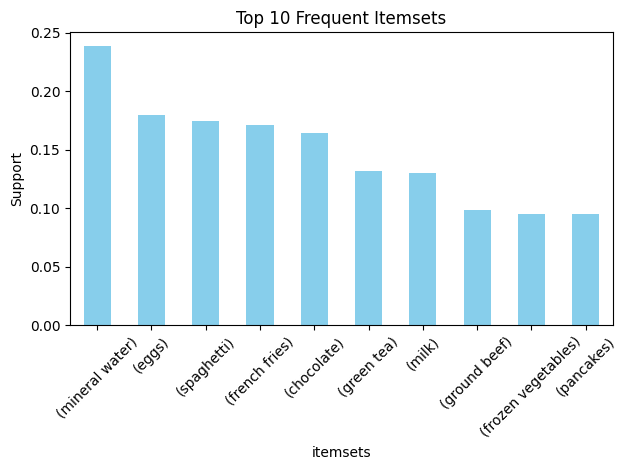

In [5]:
# Plot top 10 frequent itemsets
plt.figure(figsize=(12, 6))
frequent_itemsets.head(10).plot(kind='bar', x='itemsets', y='support', legend=False, color='skyblue')
plt.title('Top 10 Frequent Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Generate and Filter Association Rules

In [6]:
# Generate rules with confidence >= 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Filter by lift
rules = rules[rules['lift'] >= 1.5]

# Sort by lift
sorted_rules = rules.sort_values(by='lift', ascending=False)

# Display top rules
print("\nTop Association Rules by Lift:\n")
print(sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())



Top Association Rules by Lift:

           antecedents      consequents   support  confidence      lift
1  (ground beef, eggs)  (mineral water)  0.010132    0.506667  2.125563
0  (ground beef, milk)  (mineral water)  0.011065    0.503030  2.110308


 Interpret and Analyze Rules

In [7]:
# Interpret the top rules
def interpret_rules(rules_df):
    for index, row in rules_df.iterrows():
        antecedent = list(row['antecedents'])
        consequent = list(row['consequents'])
        support = row['support']
        confidence = row['confidence']
        lift = row['lift']

        print(f"\nRule: If a customer buys {antecedent}, they are likely to buy {consequent}")
        print(f"Support: {support:.2f}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")

        # Business Insight
        if lift > 2:
            print("🟢 Strong rule: Consider bundling or cross-promotions.")
        elif 1.5 < lift <= 2:
            print("🟡 Moderate association: Useful for recommendations.")
        elif support < 0.02 and lift > 1.5:
            print("🔵 Niche pattern: Target specific segments.")
        else:
            print("⚪ Weak rule: Not significantly better than chance.")

# Interpret top 10 rules
interpret_rules(sorted_rules.head(10))



Rule: If a customer buys ['ground beef', 'eggs'], they are likely to buy ['mineral water']
Support: 0.01, Confidence: 0.51, Lift: 2.13
🟢 Strong rule: Consider bundling or cross-promotions.

Rule: If a customer buys ['ground beef', 'milk'], they are likely to buy ['mineral water']
Support: 0.01, Confidence: 0.50, Lift: 2.11
🟢 Strong rule: Consider bundling or cross-promotions.
